# Estimación


In [43]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

data=pd.read_csv(r".\ag_Datos_hist_USD_COP.csv")
data["Último"]=data["Último"].str.replace(",","")
data["Apertura"]=data["Apertura"].str.replace(",","")
data[["Último","Apertura"]]=data[["Último","Apertura"]].apply(pd.to_numeric)
data["Medio"]=np.mean(data[["Apertura","Último"]].values,axis=1)
data.shape

(67, 8)

<Axes: >

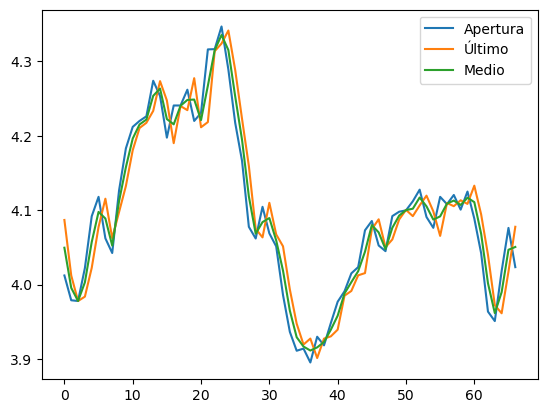

In [44]:
data[["Apertura","Último","Medio"]].plot()

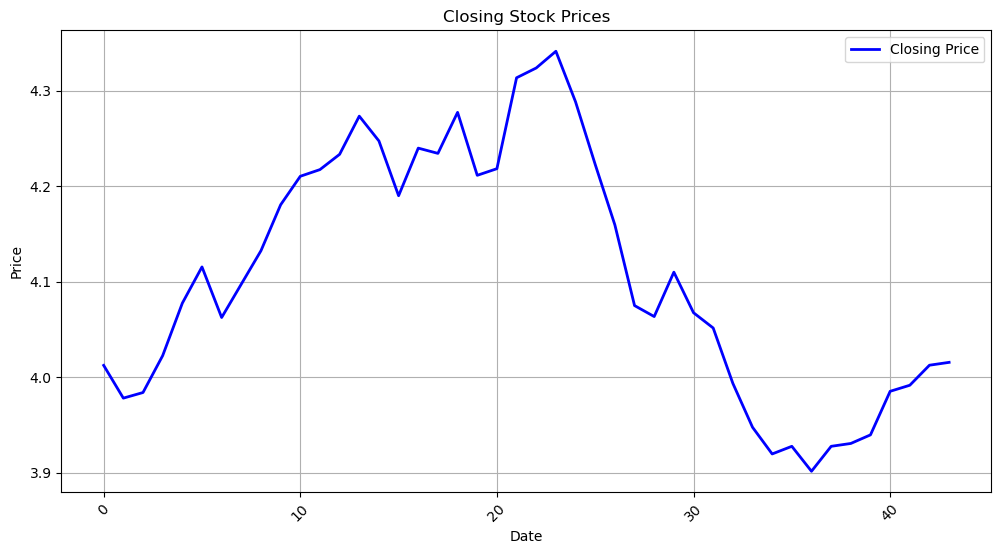

In [34]:
plt.figure(figsize=(12, 6)) 
plt.plot(data['Último'].T, label='Closing Price', color='blue', linewidth=2)

plt.title('Closing Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()



In [35]:
data["Medio"].values
#stats.normaltest()

array([3.995665, 3.978   , 4.003085, 4.057195, 4.09775 , 4.08885 ,
       4.0525  , 4.112   , 4.1578  , 4.196305, 4.21525 , 4.22186 ,
       4.25375 , 4.26353 , 4.22251 , 4.21543 , 4.24038 , 4.24824 ,
       4.24875 , 4.221145, 4.2673  , 4.31511 , 4.335475, 4.3153  ,
       4.253   , 4.194675, 4.118585, 4.0685  , 4.084045, 4.089475,
       4.05949 , 4.01877 , 3.96502 , 3.929325, 3.916785, 3.911445,
       3.915675, 3.922965, 3.93944 , 3.95827 , 3.988075, 4.00333 ,
       4.01803 , 4.044275])